In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [5]:
path = "ex2data1.txt"
data = pd.read_csv(path, header=None, names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


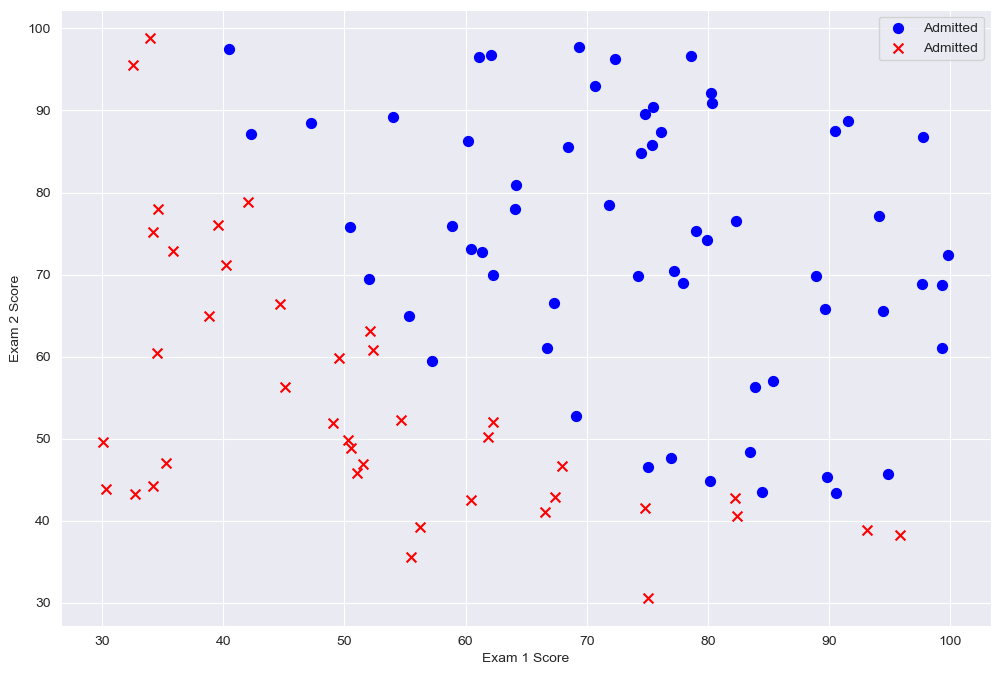

In [9]:
positive = data[data['admitted'].isin([1])]
negative = data[data['admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='Admitted')

ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [10]:
def get_X(df):
    # 读取数据的特征
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)
    return np.array(data.iloc[:, :-1])


def get_y(df):
    # 读取标签 最后一列
    return np.array(df.iloc[:, -1])


def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [14]:
X = get_X(data)
y = get_y(data)

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

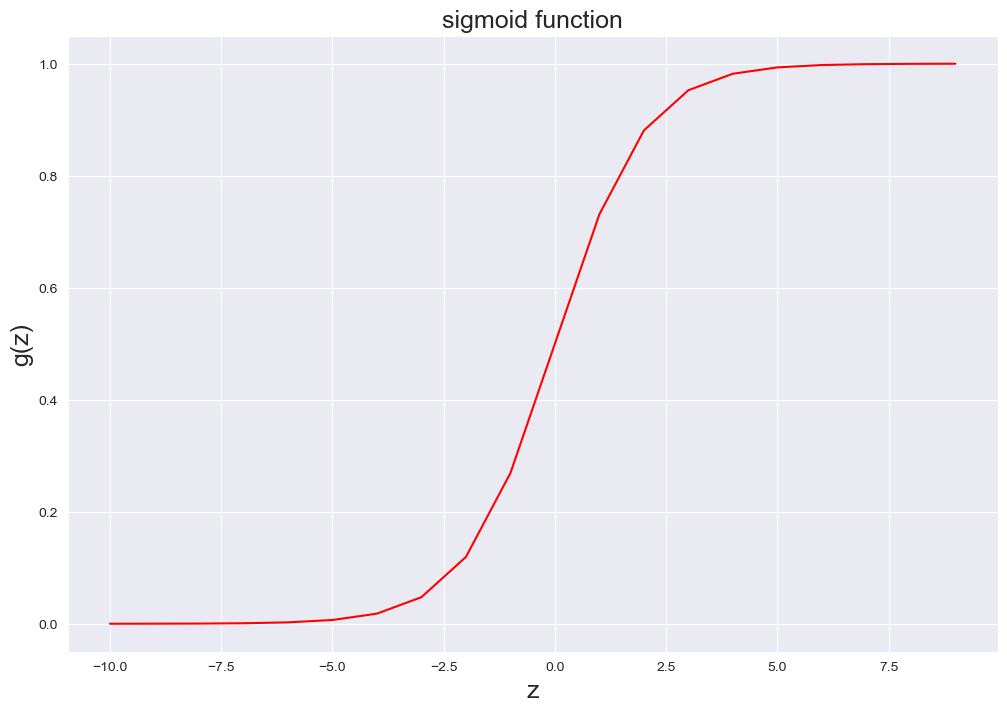

In [16]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, sigmoid(nums), 'r')
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

In [17]:
# cost function 代价函数
def cost(theta, X, y):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

In [18]:
theta = np.zeros(3)
theta

array([0., 0., 0.])

In [19]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100,))

In [20]:
cost(theta, X, y)

0.6931471805599453

In [37]:
def gradient(theta, X, y):
    theta = np.array(X)
    X = np.array(X)
    y = np.array(y)
    print("X.shape = ", X.shape)
    print("y.shape = ", y.shape)
    print("theta.shape = ", theta.shape)
    parameters = int(theta.ravel().shape[0])
    grad = np.zeros(parameters)
    error = sigmoid(X @ theta.T) - y
    print("error.shape=", error.shape)
    for i in range(parameters):
        term = X[:, i].T @ error
        grad[i] = term / len(X)
    return grad

In [35]:
gradient(theta, X, y)

X.shape =  (100, 3)
y.shape =  (100,)
theta.shape =  (100, 3)
error.shape= (100, 100)


ValueError: setting an array element with a sequence.

In [39]:
import scipy.optimize as opt

res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)
print(res)

X.shape =  (100, 3)
y.shape =  (100,)
theta.shape =  (100, 3)
error.shape= (100, 100)


ValueError: setting an array element with a sequence.

In [40]:
cost(res.x, X, y)

NameError: name 'res' is not defined

In [41]:
def predict(theta, X):
    probability = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in probability]

In [42]:
theta_min = res.x
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]

accuary = (sum(map(int, correct)) % len(correct))

print('accuary = {0}%'.format(accuary))

NameError: name 'res' is not defined

> 准确率可以衡量逻辑回顾分类器的准确性，如果一个学生被录取或者没有被录取，准确精度达到89%，

## 寻找决策边界
决策边界是一系列的$x$可以满足：$$\frac{1}{1+e^{-\theta^T x}}=0.5$$
也就是说$$e^{-\theta^T x} = 1$$
意味着 $$\theta^T X = 0$$
这是一条直线。
参考这里：http://stats.stackexchange.com/questions/93569/why-is-logistic-regression-a-linear-classifier

In [43]:
print(res.x)

NameError: name 'res' is not defined

In [44]:
x1 = np.arange(130, step=0.1)
coef = -(res.x / res.x[2])
x2 = coef[0] + coef[1]* x1

NameError: name 'res' is not defined

In [45]:
import seaborn as sns
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('exam1', 'exam2', hue='admitted', data=data, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 25}
          )

plt.plot(x1, x2, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Decision Boundary')
plt.show()

TypeError: lmplot() got multiple values for argument 'data'

加入正则项提升逻辑回归算法正则化是成本函数中的一个术语，它使算法更倾向于“更简单”的模型（在这种情况下，模型将更小的系数）。这个理论助于减少过拟合，提高模型的泛化能力。